In [2]:
# import csv
import seaborn as sns
import numpy as np
import pandas as pd

import json
import matplotlib.pyplot as plt

In [3]:
fname = '/raid/xiaoyuz1/amazon_turk/Batch_340602_batch_results.csv'
df = pd.read_csv(fname)

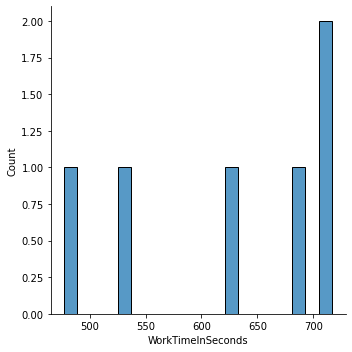

In [4]:
sns.displot(df, x="WorkTimeInSeconds", bins=20)

In [5]:
df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds',
       ...
       'Answer.question_8_step_1_yes.on', 'Answer.question_8_step_2_no.on',
       'Answer.question_8_step_2_yes.on', 'Answer.question_9_step_1_no.on',
       'Answer.question_9_step_1_yes.on', 'Answer.question_9_step_2_no.on',
       'Answer.question_9_step_2_yes.on', 'Answer.stepAnnotationInput_0',
       'Approve', 'Reject'],
      dtype='object', length=109)

In [10]:
ANS = {}
ANS[1] = [True,True,True]
ANS[2] = [True,True,True,True,True]
ANS[3] = [True,True,False,False,True,True]
ANS[4] = [False,True]
ANS[5] = [True,True,True,True,True]
ANS[6] = [False,True,True]
ANS[7] = [True,True,True,True,True,True,True]
ANS[8] = [True,True]
ANS[9] = [False,True]
ANS[10] = [True,True]


for i in range(len(df)):
    row = df.iloc[i]
    
    total_question = {}
    for j in range(10):
        total_question[j+1] = {}
    
    correct_answers = 0
    for k,v in row.items():
        if(k.startswith("Answer.question_")):
            question_idx = int(k.split("_")[1]) # Q 1
            step_idx = int(k.split("_")[3]) # Step 1
            yes_or_no = k.split("_")[4] # YES
            
            actual_answer = ANS[question_idx][step_idx-1]
            
            
            if(yes_or_no == "yes.on" and v):
                
                if(step_idx in total_question[question_idx]):
                    print("[Duplicate] Question No.", question_idx, " at Step No.", step_idx)
                    continue
                else:
                    total_question[question_idx][step_idx] = 1
                
                
                if(not actual_answer):
                    print("[Wrong] Question No.", question_idx, " at Step No.", step_idx)
                else:
                    correct_answers += 1
                    
            if(yes_or_no == "no.on" and v):
                
                if(step_idx in total_question[question_idx]):
                    print("[Duplicate] Question No.", question_idx, " at Step No.", step_idx)
                    continue
                else:
                    total_question[question_idx][step_idx] = 1
                
                if(actual_answer):
                    print("[Wrong] Question No.", question_idx, " at Step No.", step_idx)
                else:
                    correct_answers += 1
                    
    print(correct_answers/37)
    print("\n")

[Wrong] Question No. 1  at Step No. 1
[Wrong] Question No. 1  at Step No. 2
[Wrong] Question No. 2  at Step No. 1
[Wrong] Question No. 3  at Step No. 1
[Wrong] Question No. 5  at Step No. 3
[Duplicate] Question No. 5  at Step No. 3
[Wrong] Question No. 5  at Step No. 4
[Duplicate] Question No. 5  at Step No. 4
0.8378378378378378


[Wrong] Question No. 3  at Step No. 3
[Wrong] Question No. 3  at Step No. 4
0.9459459459459459


[Wrong] Question No. 9  at Step No. 1
0.972972972972973


[Wrong] Question No. 3  at Step No. 5
0.972972972972973


[Wrong] Question No. 10  at Step No. 1
[Wrong] Question No. 10  at Step No. 2
[Wrong] Question No. 3  at Step No. 3
[Wrong] Question No. 3  at Step No. 4
[Wrong] Question No. 4  at Step No. 2
[Wrong] Question No. 5  at Step No. 1
[Wrong] Question No. 6  at Step No. 2
[Wrong] Question No. 6  at Step No. 3
0.7837837837837838


1.0




In [7]:
answer = {}
answer['Answer.question_1_step_1.1'] = False
answer['Answer.question_1_step_2.2'] = False
answer['Answer.question_1_step_3.3'] = False

answer['Answer.question_2_step_1.1'] = False
answer['Answer.question_2_step_2.2'] = True
answer['Answer.question_2_step_3.3'] = False
answer['Answer.question_2_step_4.4'] = False
answer['Answer.question_2_step_5.5'] = False

answer['Answer.question_3_step_1.1'] = False
answer['Answer.question_3_step_2.2'] = False
answer['Answer.question_3_step_3.3'] = True
answer['Answer.question_3_step_4.4'] = True
answer['Answer.question_3_step_5.5'] = True
answer['Answer.question_3_step_6.6'] = False

answer['Answer.question_4_step_1.1'] = True
answer['Answer.question_4_step_2.2'] = True

answer['Answer.question_5_step_1.1'] = False
answer['Answer.question_5_step_2.2'] = False
answer['Answer.question_5_step_3.3'] = False
answer['Answer.question_5_step_4.4'] = False
answer['Answer.question_5_step_5.5'] = False

answer['Answer.question_6_step_1.1'] = True
answer['Answer.question_6_step_2.2'] = True
answer['Answer.question_6_step_3.3'] = False

answer['Answer.question_7_step_1.1'] = False
answer['Answer.question_7_step_2.2'] = False
answer['Answer.question_7_step_3.3'] = True
answer['Answer.question_7_step_4.4'] = True
answer['Answer.question_7_step_5.5'] = True
answer['Answer.question_7_step_6.6'] = False

answer['Answer.question_8_step_1.1'] = True
answer['Answer.question_8_step_2.2'] = False

answer['Answer.question_9_step_1.1'] = True
answer['Answer.question_9_step_2.2'] = False

answer['Answer.question_10_step_1.1'] = True
answer['Answer.question_10_step_2.2'] = False
answer['Answer.question_10_step_3.3'] = True
answer['Answer.question_10_step_4.4'] = True

In [32]:

for k,v in answer.items():
    print(k, (df[k] == v).sum() / len(df[k]))

Answer.question_1_step_1.1 1.0
Answer.question_1_step_2.2 1.0
Answer.question_1_step_3.3 0.875
Answer.question_2_step_1.1 0.75
Answer.question_2_step_2.2 0.75
Answer.question_2_step_3.3 0.875
Answer.question_2_step_4.4 0.875
Answer.question_2_step_5.5 0.875
Answer.question_3_step_1.1 1.0
Answer.question_3_step_2.2 1.0
Answer.question_3_step_3.3 0.25
Answer.question_3_step_4.4 0.25
Answer.question_3_step_5.5 0.625
Answer.question_3_step_6.6 0.625
Answer.question_4_step_1.1 0.875
Answer.question_4_step_2.2 0.5
Answer.question_5_step_1.1 0.75
Answer.question_5_step_2.2 1.0
Answer.question_5_step_3.3 0.75
Answer.question_5_step_4.4 0.75
Answer.question_5_step_5.5 0.75
Answer.question_6_step_1.1 0.625
Answer.question_6_step_2.2 0.375
Answer.question_6_step_3.3 0.75
Answer.question_7_step_1.1 1.0
Answer.question_7_step_2.2 1.0
Answer.question_7_step_3.3 0.625
Answer.question_7_step_4.4 0.5
Answer.question_7_step_5.5 0.375
Answer.question_7_step_6.6 0.75
Answer.question_8_step_1.1 0.125
Answe

In [37]:
for i in [5,7]:
    row = df.iloc[i]
    correct = 0
    for k,v in answer.items():
        
        if(row[k] == v):
            correct += 1
        else:
            print(k, ", user answer: ", row[k], ", true answer:", v)
    print(i, correct / len(answer))

Answer.question_3_step_3.3 , user answer:  False , true answer: True
Answer.question_3_step_4.4 , user answer:  False , true answer: True
Answer.question_6_step_3.3 , user answer:  True , true answer: False
Answer.question_7_step_4.4 , user answer:  False , true answer: True
Answer.question_7_step_5.5 , user answer:  False , true answer: True
Answer.question_8_step_1.1 , user answer:  False , true answer: True
Answer.question_10_step_3.3 , user answer:  False , true answer: True
Answer.question_10_step_4.4 , user answer:  False , true answer: True
5 0.7894736842105263
Answer.question_3_step_3.3 , user answer:  False , true answer: True
Answer.question_3_step_4.4 , user answer:  False , true answer: True
Answer.question_5_step_1.1 , user answer:  True , true answer: False
Answer.question_8_step_1.1 , user answer:  False , true answer: True
Answer.question_10_step_1.1 , user answer:  False , true answer: True
Answer.question_10_step_3.3 , user answer:  False , true answer: True
Answer.qu